# Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import copy
from tabulate import tabulate

# Loading the QMNIST data

In [2]:
# Load  QMNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9704059/9704059 [00:00<00:00, 57571648.09it/s]


Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 9406760.90it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 66686489.54it/s]


Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 10696419.36it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


# Displaying few training samples

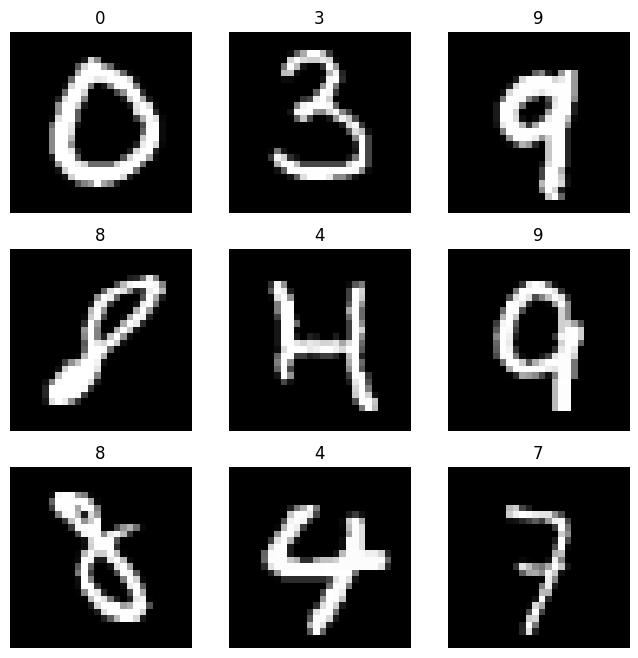

In [3]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Displaying few testing samples

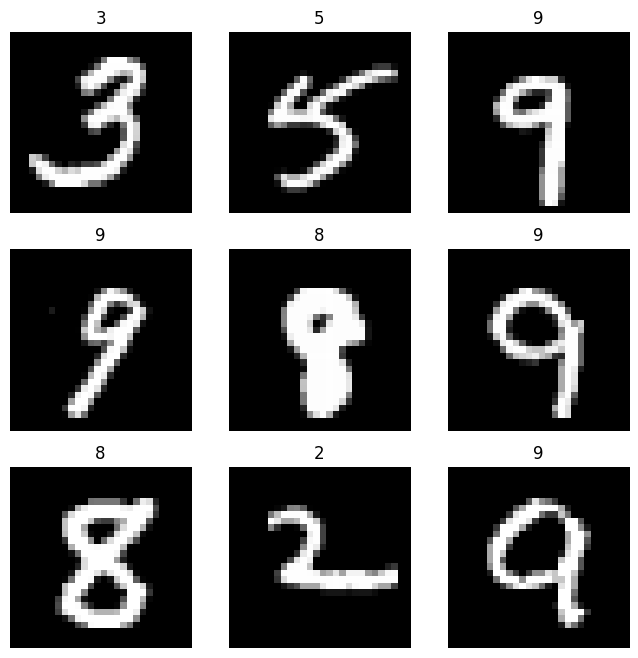

In [ ]:
#Test DataSet
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Defining the model

In [10]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

# Training the model

In [11]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
accuracy_list = []

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # Compute predicted labels
        _, predicted = torch.max(outputs, 1)

        # Compute accuracy in the current batch
        correct = (predicted == labels).sum().item()
        accuracy = correct / labels.size(0)
        accuracy_list.append(accuracy)
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {accuracy}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.036541255414486, Accuracy: 0.890625
Epoch 1, Batch 200, Loss: 0.4256257756054401, Accuracy: 0.96875
Epoch 1, Batch 300, Loss: 0.38061184152960775, Accuracy: 0.90625
Epoch 1, Batch 400, Loss: 0.3319999587535858, Accuracy: 0.953125
Epoch 1, Batch 500, Loss: 0.33945866361260413, Accuracy: 0.859375
Epoch 1, Batch 600, Loss: 0.3085305067896843, Accuracy: 0.921875
Epoch 1, Batch 700, Loss: 0.2895173014700413, Accuracy: 0.9375
Epoch 1, Batch 800, Loss: 0.2687413127720356, Accuracy: 0.875
Epoch 1, Batch 900, Loss: 0.25262050464749336, Accuracy: 0.9375
Epoch 2, Batch 100, Loss: 0.23505075335502623, Accuracy: 0.875
Epoch 2, Batch 200, Loss: 0.21711546052247285, Accuracy: 0.9375
Epoch 2, Batch 300, Loss: 0.20563804790377616, Accuracy: 0.96875
Epoch 2, Batch 400, Loss: 0.1934604348987341, Accuracy: 0.90625
Epoch 2, Batch 500, Loss: 0.1902539701014757, Accuracy: 0.984375
Epoch 2, Batch 600, Loss: 0.18722608827054502, Accuracy: 0.96875
Epoch 2, Batch 700, Loss: 0.18284388

# Get training accuracy

In [14]:
print('Final training accuracy: ', accuracy_list[-1])

Final training accuracy:  0.96875


# Evaluate and get test accuracy

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Accuracy on test set: 0.9585666666666667%


In [ ]:
# Evaluate the model and store predictions
model.eval()
predictions = []
labels_actual = []
images_tensor = torch.tensor()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        labels_actual.extend(labels.numpy())
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Test one image for its label

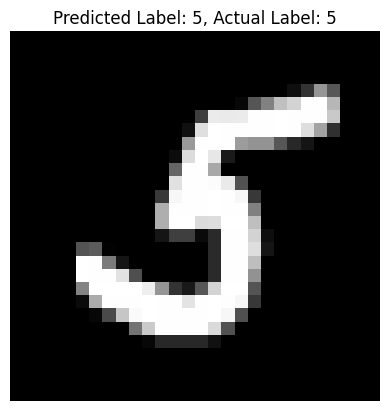

In [ ]:
# Get one test image and its label
image, label = images[0], labels[0]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted[0]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

# Lets add one more dense layer of 128 nodes

If we add one more layer the accuracy of the model has to improve as it can capture much complex relationships.

In [ ]:
#Define the neural network architecture
class MLP_ExtraDense(nn.Module):
    def __init__(self):
        super(MLP_ExtraDense, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the neural network
model_ED = MLP_ExtraDense()

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ED.parameters(), lr=0.001)
accuracy_list = []

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model_ED.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_ED(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # Compute predicted labels
        _, predicted = torch.max(outputs, 1)

        # Compute accuracy in the current batch
        correct = (predicted == labels).sum().item()
        accuracy = correct / labels.size(0)
        accuracy_list.append(accuracy)
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {accuracy}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0908314937353134, Accuracy: 0.921875
Epoch 1, Batch 200, Loss: 0.4582017827033997, Accuracy: 0.84375
Epoch 1, Batch 300, Loss: 0.3937344796955585, Accuracy: 0.921875
Epoch 1, Batch 400, Loss: 0.3296235267072916, Accuracy: 0.859375
Epoch 1, Batch 500, Loss: 0.32438005663454533, Accuracy: 0.859375
Epoch 1, Batch 600, Loss: 0.27785587422549723, Accuracy: 0.921875
Epoch 1, Batch 700, Loss: 0.27458321340382097, Accuracy: 0.9375
Epoch 1, Batch 800, Loss: 0.26916269704699514, Accuracy: 0.90625
Epoch 1, Batch 900, Loss: 0.2403833417594433, Accuracy: 0.953125
Epoch 2, Batch 100, Loss: 0.19989960327744483, Accuracy: 0.890625
Epoch 2, Batch 200, Loss: 0.19475963905453683, Accuracy: 0.9375
Epoch 2, Batch 300, Loss: 0.20979110967367887, Accuracy: 0.9375
Epoch 2, Batch 400, Loss: 0.18459630079567432, Accuracy: 0.921875
Epoch 2, Batch 500, Loss: 0.17785706982016564, Accuracy: 0.90625
Epoch 2, Batch 600, Loss: 0.15860293805599213, Accuracy: 0.984375
Epoch 2, Batch 700, Loss

# Train accuracy after introducing one more hidden layer with 128 nodes

In [15]:
print('Final training accuracy: ', accuracy_list[-1])

Final training accuracy:  0.984375


# Evaluate the model with test data after introducing one more hidden layer with 128 nodes.

In [ ]:
# Evaluate the model_ED
model_ED.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_ED(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Accuracy on test set: 0.966%


# Both train and test accuracy has increased after introducing an additional hidden layer with 128 nodes. This matches our hypothesis.

# Lets increase the number of nodes in the hidden layer to 256

If the number of nodes increase then there is high chance that the accuracy of the model also increase as it can capture much complex relationships. But it depends on varius factors.

In [ ]:
#Define the neural network architecture
class MLP_ExtraWide(nn.Module):
    def __init__(self):
        super(MLP_ExtraWide, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP_ExtraWide()

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
accuracy_list = []

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # Compute predicted labels
        _, predicted = torch.max(outputs, 1)

        # Compute accuracy in the current batch
        correct = (predicted == labels).sum().item()
        accuracy = correct / labels.size(0)
        accuracy_list.append(accuracy)
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}, Accuracy: {accuracy}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.8794121161103249, Accuracy: 0.796875
Epoch 1, Batch 200, Loss: 0.4131761087477207, Accuracy: 0.875
Epoch 1, Batch 300, Loss: 0.3387080562859774, Accuracy: 0.859375
Epoch 1, Batch 400, Loss: 0.31678474850952626, Accuracy: 0.875
Epoch 1, Batch 500, Loss: 0.2803440737724304, Accuracy: 0.875
Epoch 1, Batch 600, Loss: 0.2571839462965727, Accuracy: 0.96875
Epoch 1, Batch 700, Loss: 0.2268307425454259, Accuracy: 0.890625
Epoch 1, Batch 800, Loss: 0.21294144384562969, Accuracy: 0.953125
Epoch 1, Batch 900, Loss: 0.21409927871078252, Accuracy: 0.890625
Epoch 2, Batch 100, Loss: 0.16780395202338697, Accuracy: 0.890625
Epoch 2, Batch 200, Loss: 0.17049898192286492, Accuracy: 1.0
Epoch 2, Batch 300, Loss: 0.17692255198955537, Accuracy: 0.921875
Epoch 2, Batch 400, Loss: 0.15507751233875752, Accuracy: 0.953125
Epoch 2, Batch 500, Loss: 0.14057158013805748, Accuracy: 0.96875
Epoch 2, Batch 600, Loss: 0.15438833562657236, Accuracy: 0.953125
Epoch 2, Batch 700, Loss: 0.1461

# Training accuracy after increasing the nodes in hidden layer to 256

In [16]:
print('Final training accuracy: ', accuracy_list[-1])

Final training accuracy:  0.984375


# Test accuracy after increasing the nodes in hidden layer to 256

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total}%')

Accuracy on train set: 0.98295%


In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Accuracy on test set: 0.9710666666666666%


# Both train and test accuracy has increased after increasing the number of nodes in hidden layer from 128 nodes to 256. This matches our hypothesis.

# Performing Hyperparameter tuning

In [3]:
#Define the neural network architecture with relu activation function
class MLP_relu(nn.Module):
    def __init__(self):
        super(MLP_relu, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
#Define the neural network architecture with sigmoid activation function
class MLP_sigmoid(nn.Module):
    def __init__(self):
        super(MLP_sigmoid, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

Drop out layers acts as regularization units and helps in reducing overfitting

In [5]:
#Define the neural network architecture with dropout in the input layer or visible layers
class MLP_dropout_input(nn.Module):
    def __init__(self):
        super(MLP_dropout_input, self).__init__()
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
#Define the neural network architecture with dropout in the hidden layers which is more common
class MLP_dropout_hidden(nn.Module):
    def __init__(self):
        super(MLP_dropout_hidden, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
def model_evaluate(model):
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  accuracy = correct / total
  return accuracy

In [8]:
model_list = list()
loss_list = list()
optimizer_list = list()
accuracy_list = list()

In [9]:
# models with relu and sigmoid activation function
models_activation_dropout = [MLP_relu(), MLP_sigmoid(), MLP_dropout_input(), MLP_dropout_hidden()]
loss = [nn.CrossEntropyLoss()]
optimizer_list = ['Adam', 'SGD'] # choose 1 for Adam optimizer and 2 for SGD optimizer
num_epochs = 5
accuracy_list = []

for loss_func in loss:
  for optimize in optimizer_list:
    for model in models_activation_dropout:
      for epoch in range(num_epochs):
        # Define the loss function and optimizer
        model.train()
        criterion = loss_func
        if(optimize=='Adam'):
          optimizer = optim.Adam(model.parameters(), lr=0.001)
        else:
          optimizer = optim.SGD(model.parameters(), lr=0.001)
        print('model: ', model.__class__.__name__)
        print('loss: ', loss_func)
        print('Optimizer: ', optimize)
        running_loss = 0.0
        print('epoch: ', epoch)
        for i, data in enumerate(train_loader, 0):
          inputs, labels = data
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

        acc = model_evaluate(model)
        print('Accuracy: ', round(acc, 4))

model:  MLP_relu
loss:  CrossEntropyLoss()
Optimizer:  Adam
epoch:  0
Accuracy:  0.9358
model:  MLP_relu
loss:  CrossEntropyLoss()
Optimizer:  Adam
epoch:  1
Accuracy:  0.9456
model:  MLP_relu
loss:  CrossEntropyLoss()
Optimizer:  Adam
epoch:  2
Accuracy:  0.9626
model:  MLP_relu
loss:  CrossEntropyLoss()
Optimizer:  Adam
epoch:  3
Accuracy:  0.9636
model:  MLP_relu
loss:  CrossEntropyLoss()
Optimizer:  Adam
epoch:  4
Accuracy:  0.9678
model:  MLP_sigmoid
loss:  CrossEntropyLoss()
Optimizer:  Adam
epoch:  0
Accuracy:  0.918
model:  MLP_sigmoid
loss:  CrossEntropyLoss()
Optimizer:  Adam
epoch:  1
Accuracy:  0.9439
model:  MLP_sigmoid
loss:  CrossEntropyLoss()
Optimizer:  Adam
epoch:  2
Accuracy:  0.9596
model:  MLP_sigmoid
loss:  CrossEntropyLoss()
Optimizer:  Adam
epoch:  3
Accuracy:  0.9613
model:  MLP_sigmoid
loss:  CrossEntropyLoss()
Optimizer:  Adam
epoch:  4
Accuracy:  0.9635
model:  MLP_dropout_input
loss:  CrossEntropyLoss()
Optimizer:  Adam
epoch:  0
Accuracy:  0.9216
model:  M

# Hyperparameter tuning done on different parameters



*   Optimizers function - two different optimizers Adam and SGD were used in the hyperparameter tuning, it can be seen that both the activation function perform equally well
*   Activation function - ReLU and Sigmoid activation functions were used for testing and ReLU outperformed sigmoid in terms of accuracy


*   Drop outs - Dropouts were introduced in input layers and hidden layers for testing. It can be seen that introducing drop outs increases the model accuracy and drop outs introduced at hidden layers outperform dropouts introduced in input layers.
*   Loss function - The cross-Entropy loss function was used as the cost function.


*   Epochs - the models were tested for 5 epochs.





